In [1]:
using PyPlot

# Aufgabe 1

### Teilaufgabe a

In [2]:
function trapeze(func, start, stop, N)
    h = (stop-start)/(N-1)
    I = -h*(func(start)+func(stop))/2
    for x = linspace(start, stop, N)
        I += h*func(x)
    end
    return I
end

trapeze (generic function with 1 method)

### Teilaufgabe b

In [3]:
I_num = trapeze(sin, 0, pi, 100)
I_ana = -cos(pi)+cos(0)
d_I = abs(I_num-I_ana)
println(@sprintf("Delta I betraegt %E", d_I))

Delta I betraegt 1.678361E-04


### Teilaufgabe c

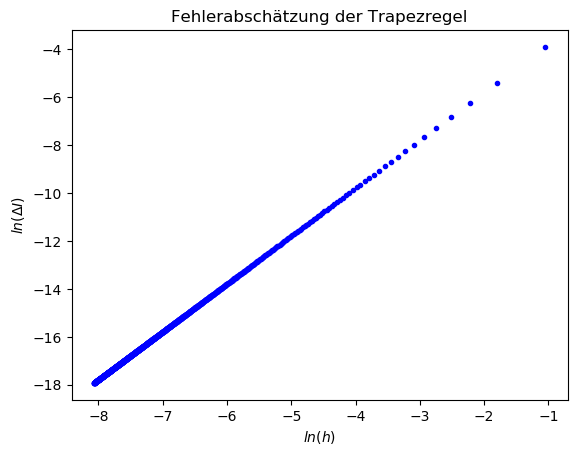

In [4]:
a = 0
b = pi
N_step = 10
I_ana = -cos(pi)+cos(0)
x = Array(Float64, Int(round((10000-10)/N_step, RoundDown)+1))
y = Array(Float64, Int(round((10000-10)/N_step, RoundDown)+1))
i = 1
for N in 10:N_step:10000
    x[i] = log((b-a)/(N-1))
    d_I = abs(trapeze(sin, a, b, N)-I_ana)
    y[i] = log(d_I)
    i += 1
end
p = plot(x, y, "b.")
xlabel("\$ln(h)\$")
ylabel("\$ln(\\Delta I)\$")
title("Fehlerabschätzung der Trapezregel")
show()

### Teilaufgabe d

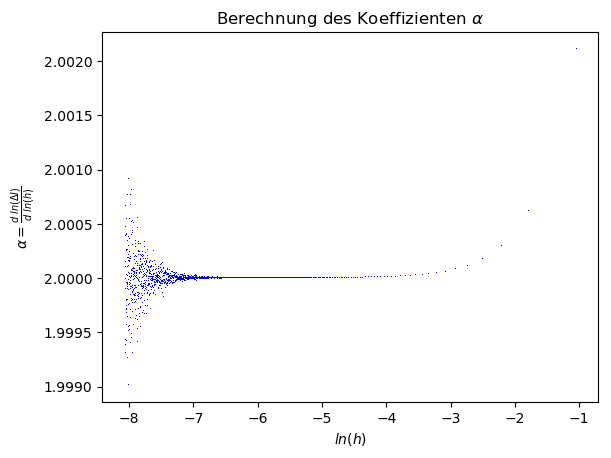

In [5]:
forward_diff_x = Array(Float64, length(x)-1)
forward_diff = Array(Float64, length(x)-1)
for i = 1:length(x)-1
    forward_diff_x[i] = x[i]
    forward_diff[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
end
p = plot(forward_diff_x, forward_diff, "b,")
xlabel("\$ln(h)\$")
ylabel("\$\\alpha = \\frac{d\\ ln(\\Delta I)}{d\\ ln(h)}\$")
title("Berechnung des Koeffizienten \$\\alpha\$")
show()

# Aufgabe 2

### Teilaufgabe a

In [7]:
function f(x)
    return 5*x^4
end
function simpson(func, start, stop, N)
    if N%2 != 1
        throw(ArgumentError("N is not uneven"))
    end
    I = 0
    h = (stop-start)/(N-1)
    x = linspace(start, stop, N)
    for i in 1:N
        f_i = func(x[i])
        if i in [1, N]
            I += f_i
        elseif i%2 == 0
            I += f_i*4
        else
            I += f_i*2
        end
    end
    return I*h/3
end

simpson (generic function with 1 method)

### Teilaufgabe b

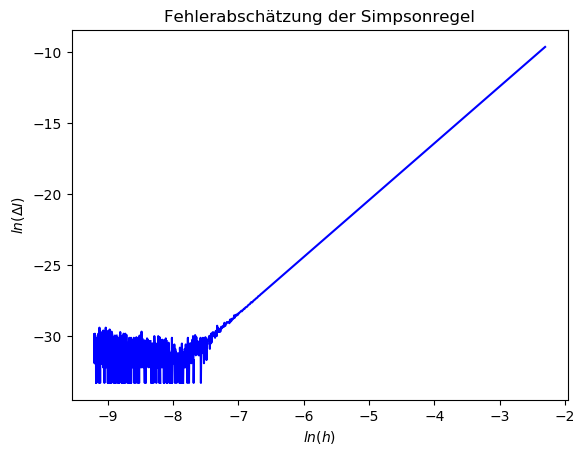

In [8]:
a = 1
b = 2
N_step = 10
I_ana = 31
x = Array(Float64, Int(round((10000-10)/N_step, RoundDown)+1))
y = Array(Float64, Int(round((10000-10)/N_step, RoundDown)+1))
i = 1
for N in 11:N_step:10001
    x[i] = log((b-a)/(N-1))
    d_I = abs(simpson(f, a, b, N)-I_ana)
    y[i] = log(d_I)
    i += 1
end
p = plot(x, y, "b-")
xlabel("\$ln(h)\$")
ylabel("\$ln(\\Delta I)\$")
title("Fehlerabschätzung der Simpsonregel")
show()

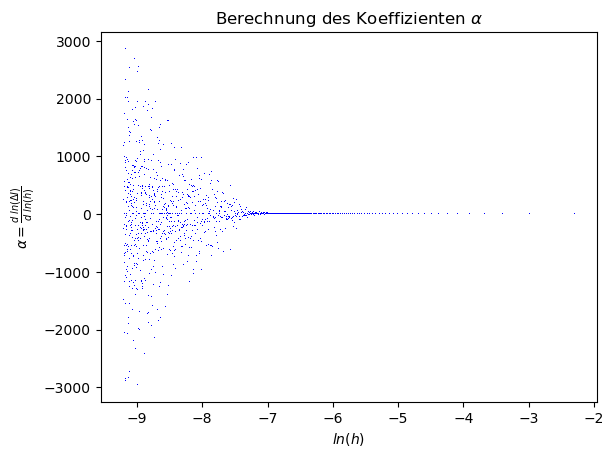

In [9]:
forward_diff_x = Array(Float64, length(x)-1)
forward_diff = Array(Float64, length(x)-1)
for i = 1:length(x)-1
    forward_diff_x[i] = x[i]
    forward_diff[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
end
p = plot(forward_diff_x, forward_diff, "b,")
xlabel("\$ln(h)\$")
ylabel("\$\\alpha = \\frac{d\\ ln(\\Delta I)}{d\\ ln(h)}\$")
title("Berechnung des Koeffizienten \$\\alpha\$")
#ax = gca()
#ax[:set_ylim]((-10,10))
show()

# Aufgabe 3

### Teilaufgabe a

In [10]:
function factorize_me(M, output=true)
    f1 = Int(round(sqrt(M), RoundDown))
    f2 = f1+1
    while f1 > 0
        if output
            println(@sprintf("%i\t%i", f1, f2))
        end
        if f1*f2 == M
            break
        elseif f1*f2 > M
            f1 -= 1
        else
            f2 +=1
        end
    end
    return (f1, f2)
end
factorize_me(731)

27	28
26	28
26	29
25	29
25	30
24	30
24	31
23	31
23	32
22	32
22	33
22	34
21	34
21	35
20	35
20	36
20	37
19	37
19	38
19	39
18	39
18	40
18	41
17	41
17	42
17	43


(17,43)

### Teilaufgabe b

In [11]:
z = [5047632089, 29597574011, 67873310559651, 1556617449037459651]
for i in 1:4
    (f1, f2) = factorize_me(z[i], false)
    println(@sprintf("z%i is the product of %i and %i", i, f1, f2))
end

z1 is the product of 56453 and 89413
z2 is the product of 56453 and 524287
z3 is the product of 8238221 and 8238831
z4 is the product of 1237238221 and 1258138831
